<h2><font color="#004D7F" size=6> Suicidios en  el mundo </font></h2>

  <font color="#004D7F" size=3>Storytelling</font><br>

<br><br>
<div style="text-align: right">

<font color="#004D7F" size=3>Luengas Nova Danyela Alejandra</font><br>



In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.rcParams['figure.figsize']=('12, 6')# figuras de 12*6
plt.style.use('ggplot')


In [2]:
df=pd.read_csv('master.csv')
df.shape

(27820, 12)

In [3]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [4]:
df.head(4)

country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   

   suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
0               6.71  Albania1987           NaN      2,156,624,900   
1               5.19  Albania1987           NaN      2,156,624,900   
2               4.83  Albania1987           NaN      2,156,624,900   
3               4.59  Albania1987           NaN      2,156,624,900   

   gdp_per_capita ($)       generation  
0                 796     Generation X  
1                 796           Silent  
2                 796     Generation X  
3                 796  G.I. Generation

In [5]:
#Nulos
df.isnull().sum()
1987-2015

-28

In [6]:
#Elimina daos nulos 
df.dropna(inplace=True)
df.drop(labels=['HDI for year','country-year'],inplace=True,axis=1)
df.shape

(8364, 10)

In [7]:
# cantidad de paises 
paises =df.groupby('country')
paises.groups.keys()

dict_keys(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Ecuador', 'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Lithuania', 'Luxembourg', 'Maldives', 'Malta', 'Mauritius', 'Mexico', 'Montenegro', 'Netherlands', 'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay', 'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Saint Lucia', 'Saint Vincent and Grenadines', 'Serbia', 'Seychelles', 'Singapore', 'Slovakia', 'Slovenia', 'South Africa', 'Spain', 'Sri Lanka', 'Suriname', 'Sweden', 'Switzerland', 'Thailand', 'Tri

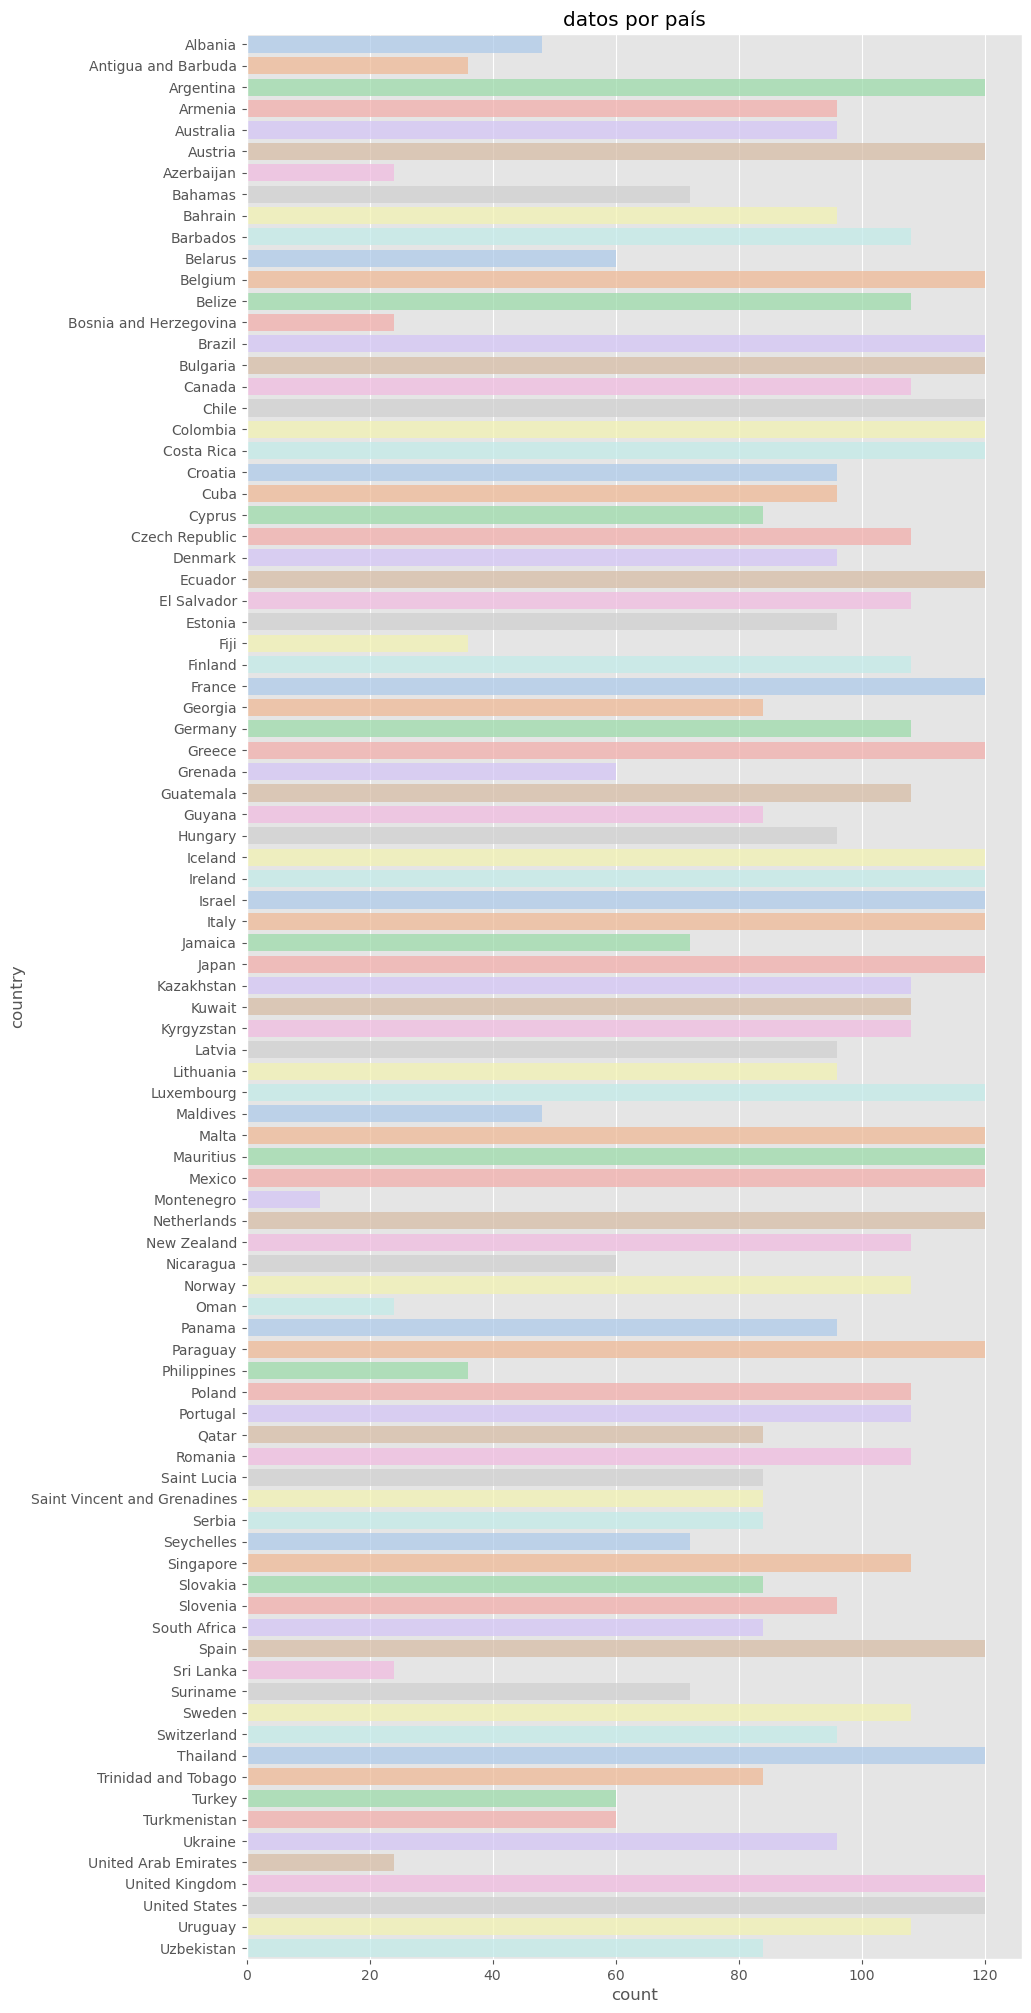

In [8]:
#cantidad de registros por país 
alpha = 0.7
plt.figure(figsize=(10,25))
sns.countplot(y='country', data=df, alpha=alpha,  palette="pastel")
#sns.color_palette("pastel")
plt.title('datos por país')
plt.show()

In [9]:
df0=df.groupby(df.country).sum()

<AxesSubplot: xlabel='gdp_per_capita ($)', ylabel='suicides_no'>

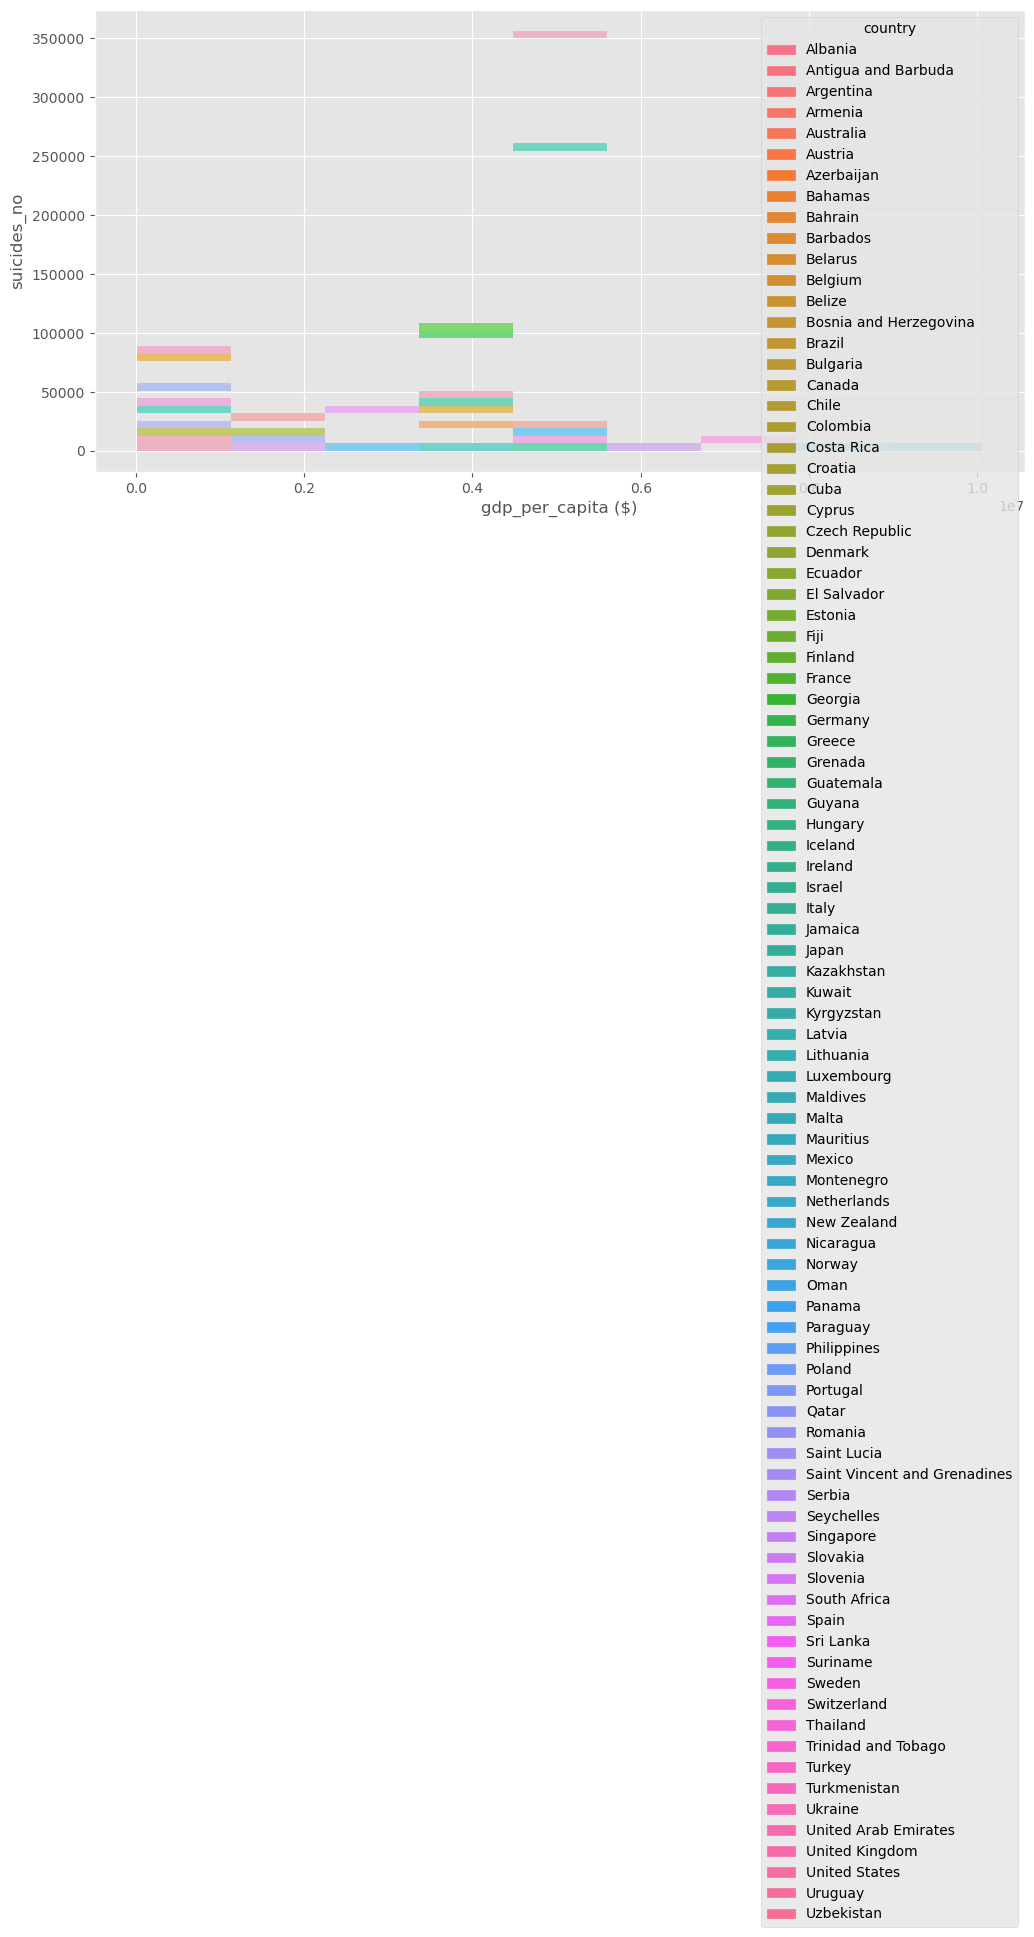

In [10]:
sns.histplot(x = 'gdp_per_capita ($)', y = 'suicides_no', hue='country', data=df0)

<AxesSubplot: xlabel='gdp_per_capita ($)', ylabel='suicides_no'>

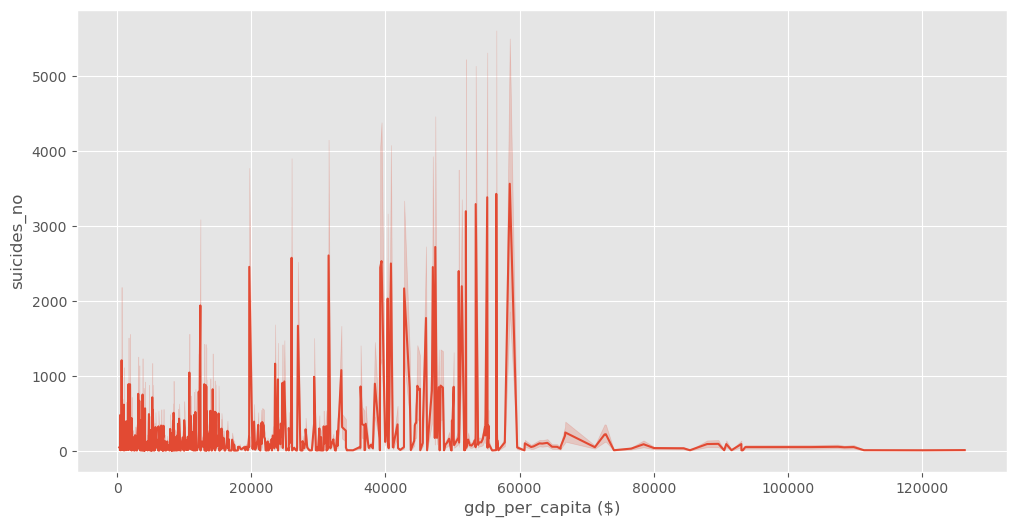

In [11]:
sns.lineplot(x = 'gdp_per_capita ($)', y = 'suicides_no', data=df)

<AxesSubplot: xlabel='year', ylabel='suicides_no'>

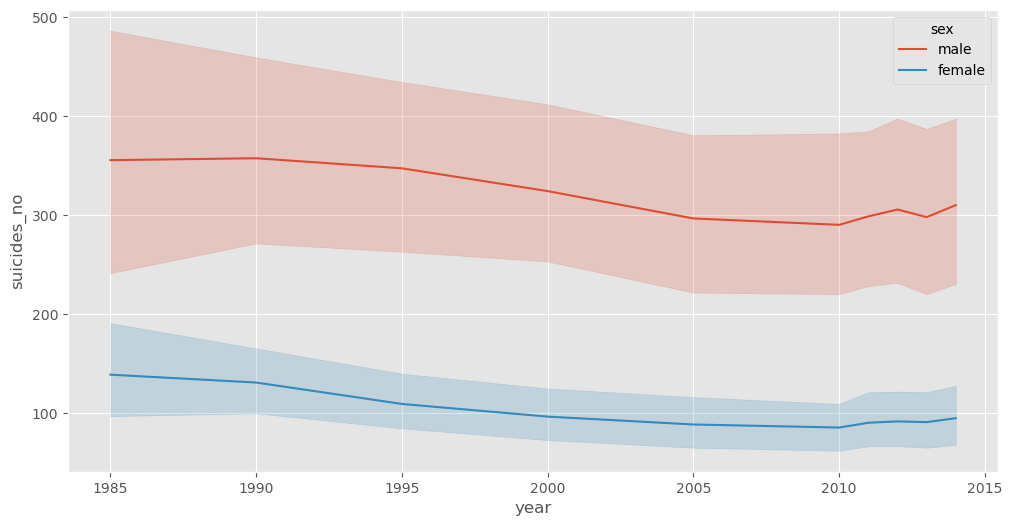

In [12]:
sns.lineplot(x = 'year', y = 'suicides_no', hue='sex', data=df)

Text(0.5, 1.0, 'Paises y edaddes de co  mayor numero de suicidios  ')

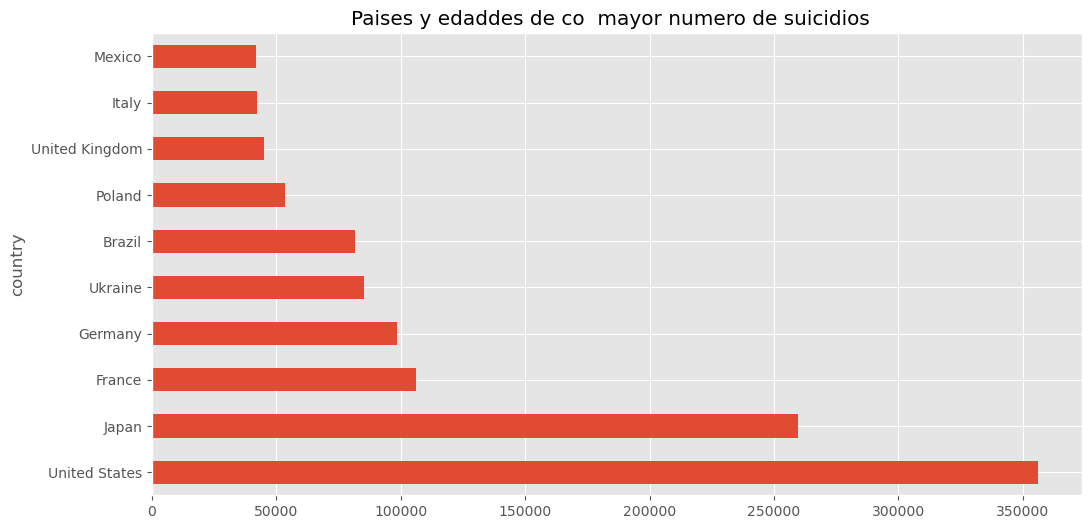

In [13]:
df.groupby(df.country).suicides_no.sum().nlargest(10).plot(kind='barh')
plt.title('Paises y edades de con  mayor número de suicidios  ')

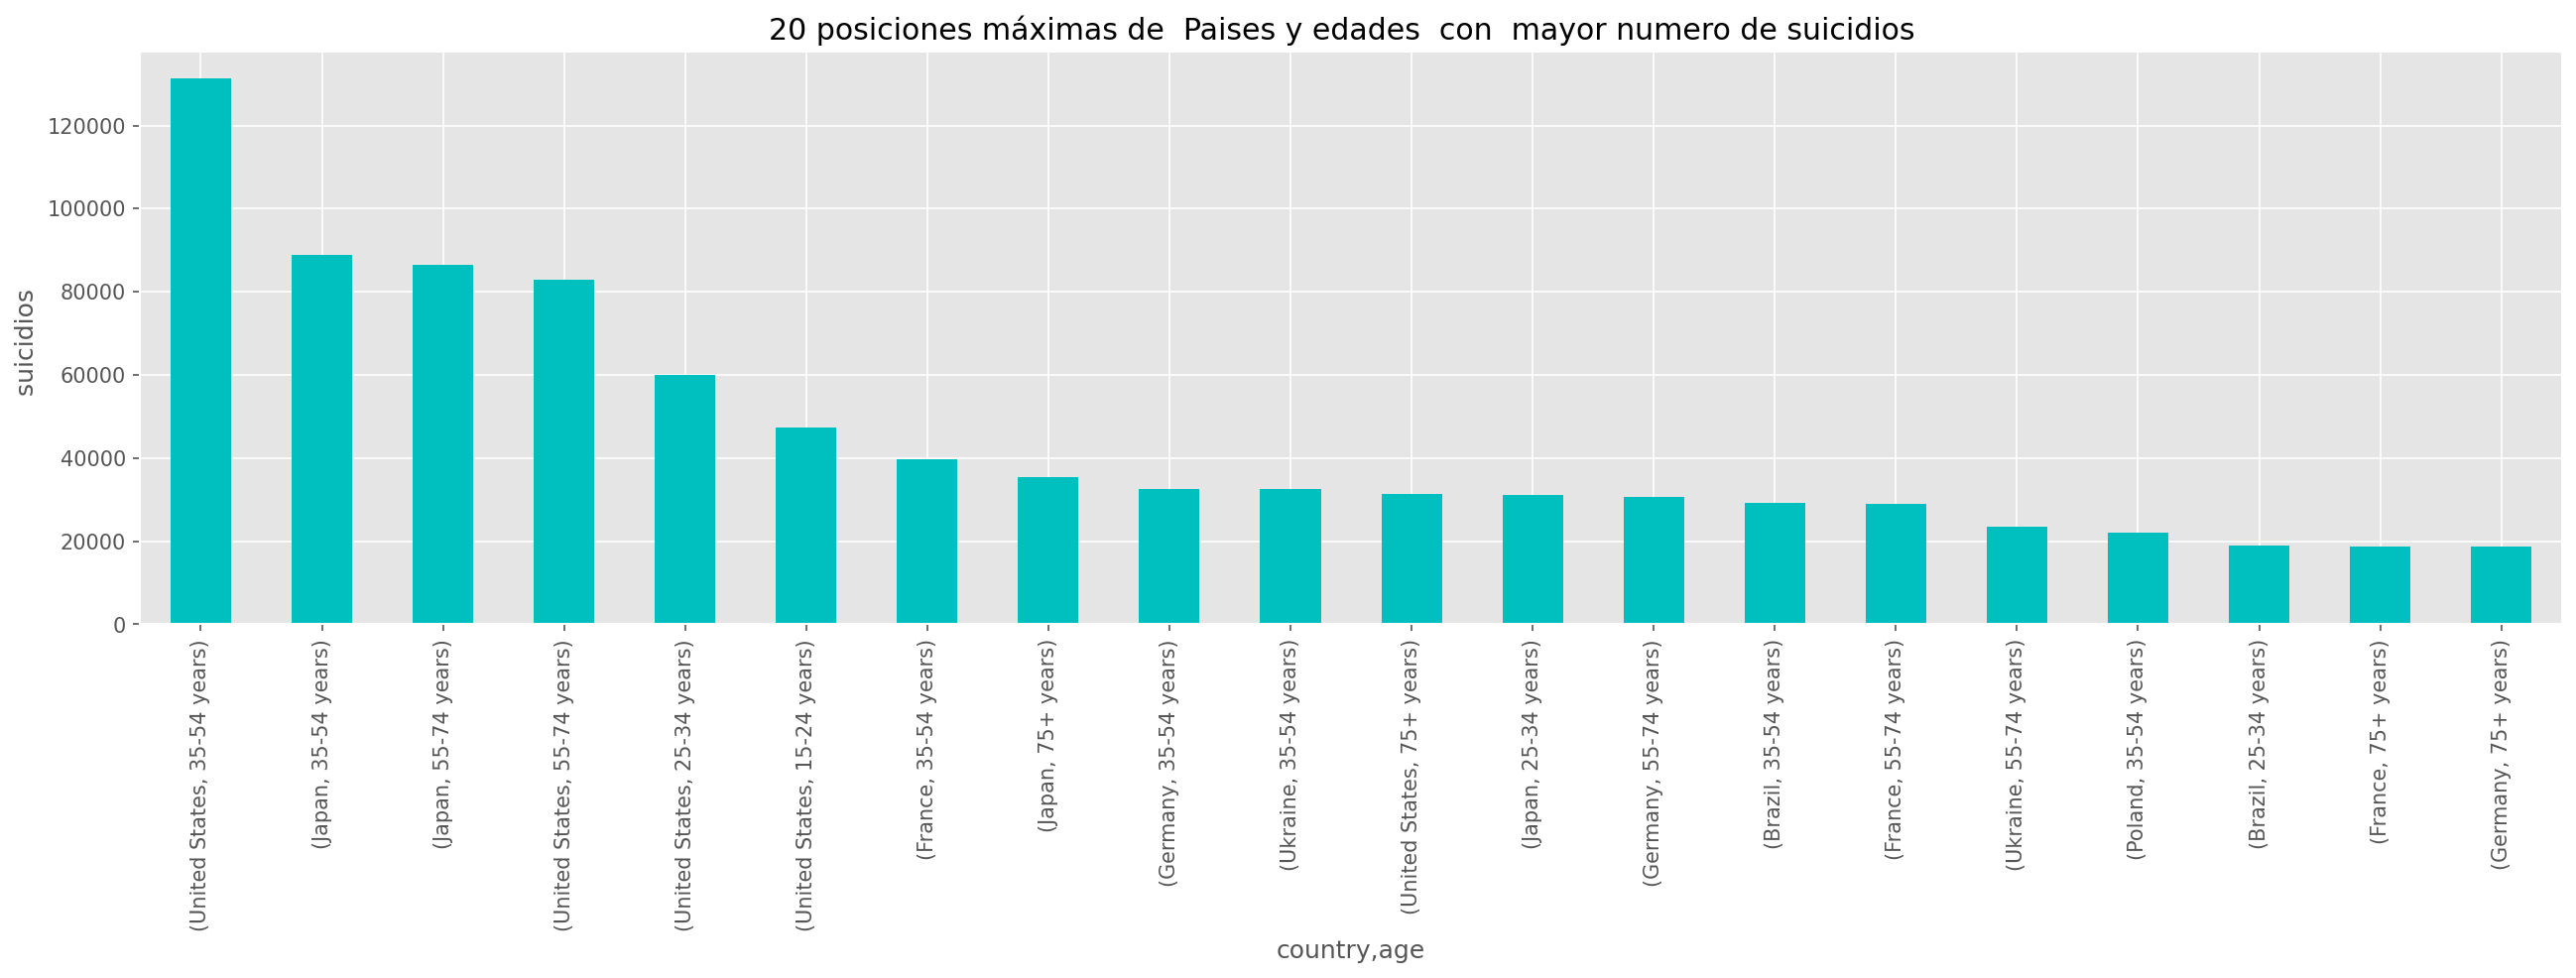

In [14]:
plt.figure(figsize=(21,5),dpi=150)
df.groupby([df.country, df.age]).suicides_no.sum().nlargest(20).plot(kind='bar', color='c')
plt.ylabel('suicidios ')
plt.title('20 posiciones máximas de  Paises y edades  con  mayor número de suicidios  ')
plt.show()

In [15]:
max_suicidios=pd.DataFrame(df.groupby(df.country).suicides_no.sum().nlargest(15))
max_suicidios

suicides_no
country                    
United States        355963
Japan                259729
France               106296
Germany               98542
Ukraine               85362
Brazil                81549
Poland                53345
United Kingdom        45037
Italy                 42416
Mexico                41763
Thailand              39631
Canada                33612
Kazakhstan            33090
Spain                 33064
Argentina             27485

In [16]:
min_suicidios = pd.DataFrame(df.groupby(df.country).suicides_no.sum()).nsmallest(15,columns='suicides_no')
min_suicidios

suicides_no
country                                  
Antigua and Barbuda                     0
Grenada                                 3
Maldives                                4
Oman                                   20
Seychelles                             32
Saint Vincent and Grenadines           35
Bahamas                                39
Barbados                               54
Saint Lucia                            68
Fiji                                   92
Azerbaijan                            111
Jamaica                               118
Montenegro                            118
Bahrain                               152
Belize                                154

<Figure size 3150x750 with 0 Axes>

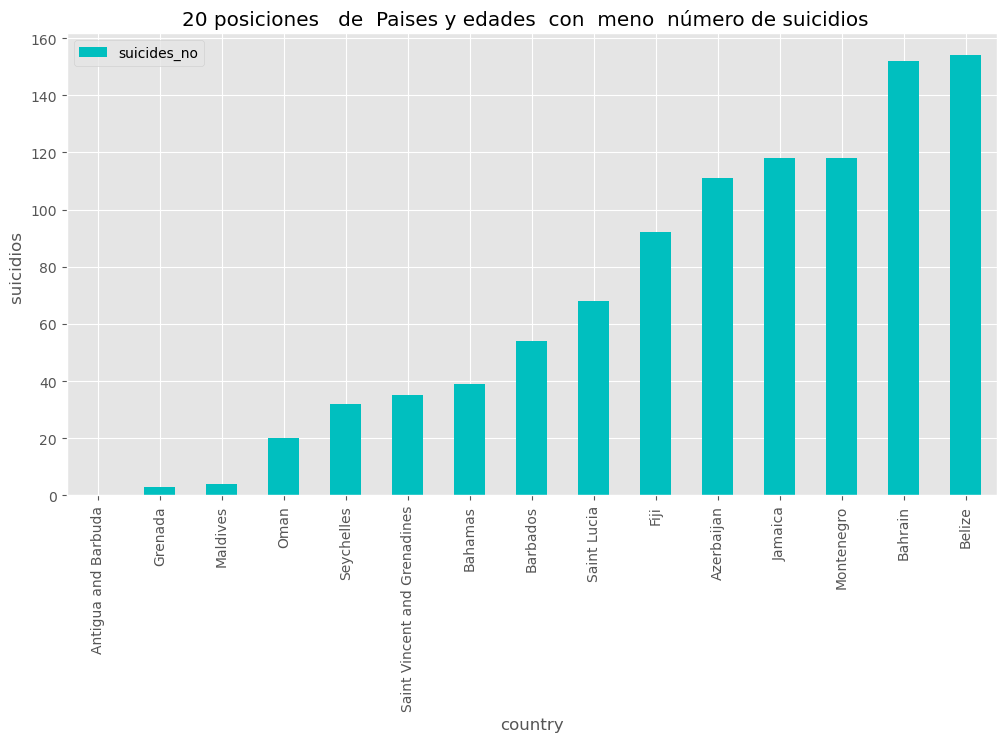

In [17]:
plt.figure(figsize=(21,5),dpi=150)
min_suicidios.plot(kind='bar', color='c')
plt.ylabel('suicidios ')
plt.title('20 posiciones   de  Paises y edades  con  menor  número de suicidios  ')
plt.show()


#por otro lado la isla de antgua y barbuda no presenta suicidioo o reporte alguno  y el pais con menos uciido es grenada y y maldives con menos de 10 sucidios durante 28 años  

<h2><font color="#004D7F" size=6> Suicidios en  México </font></h2> 

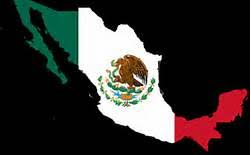



In [18]:
df1=df[df['country']=='Mexico']
df1['suicides_no'].sum()

41763

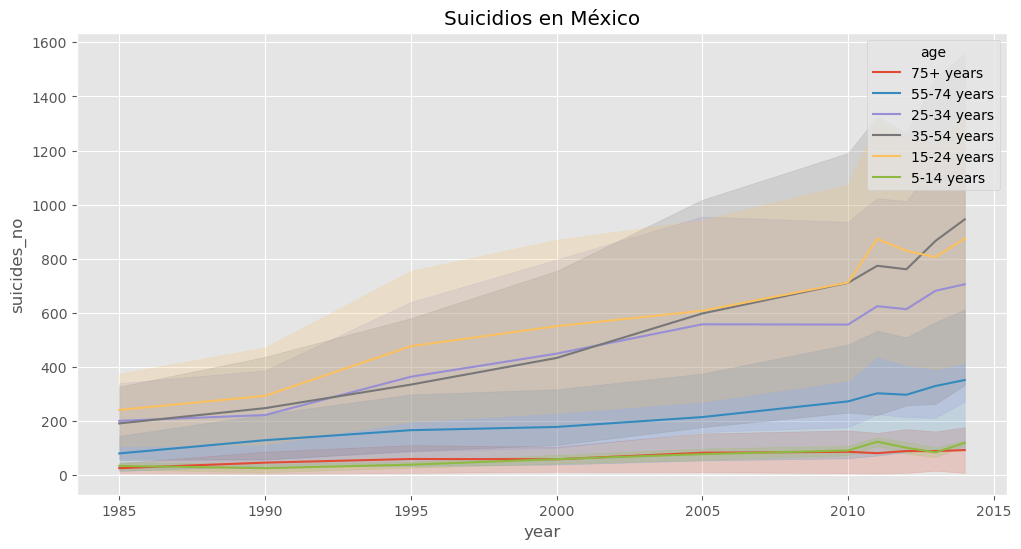

In [19]:
sns.lineplot(x = 'year', y = 'suicides_no', hue='age', data=df1)
_ =plt.title('Suicidios en México')

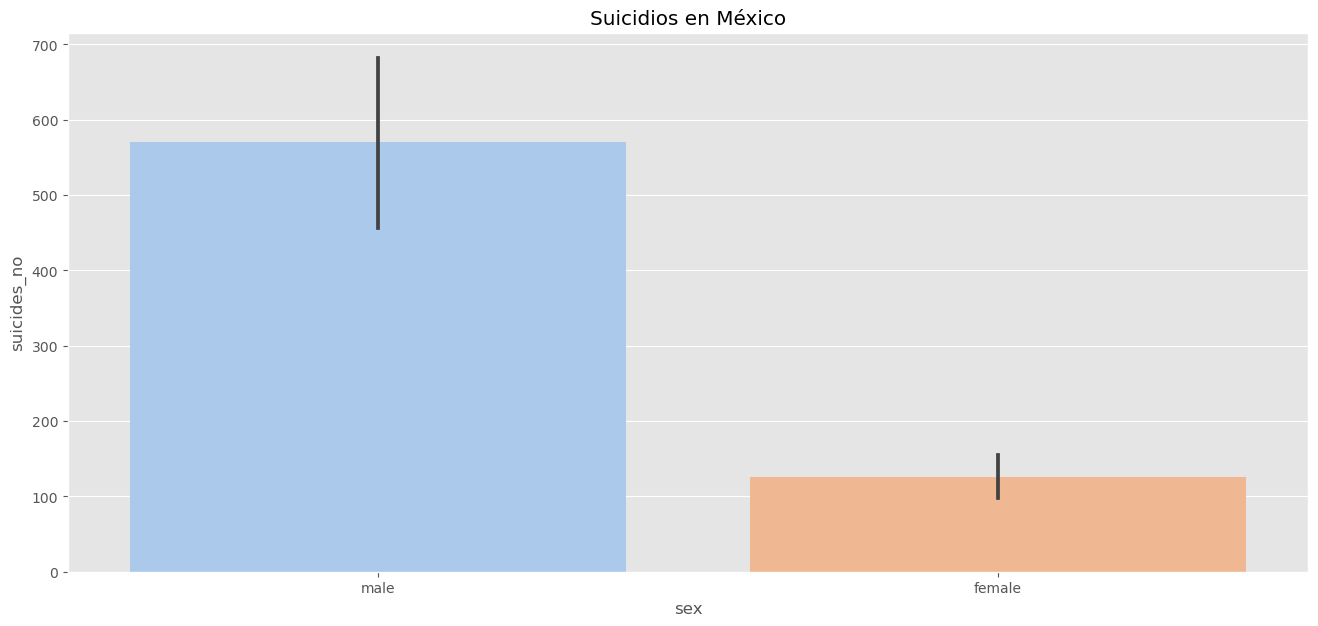

In [20]:
plt.figure(figsize=(16,7))
sns.barplot(x="sex", y="suicides_no", data=df1, palette="pastel")
_ =plt.title('Suicidios en México')

<h2><font color="#004D7F" size=6> Suicidios en  Estados Unidos </font></h2>

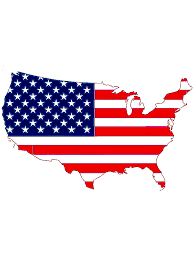


In [21]:
df2=df[df['country']=='United States']

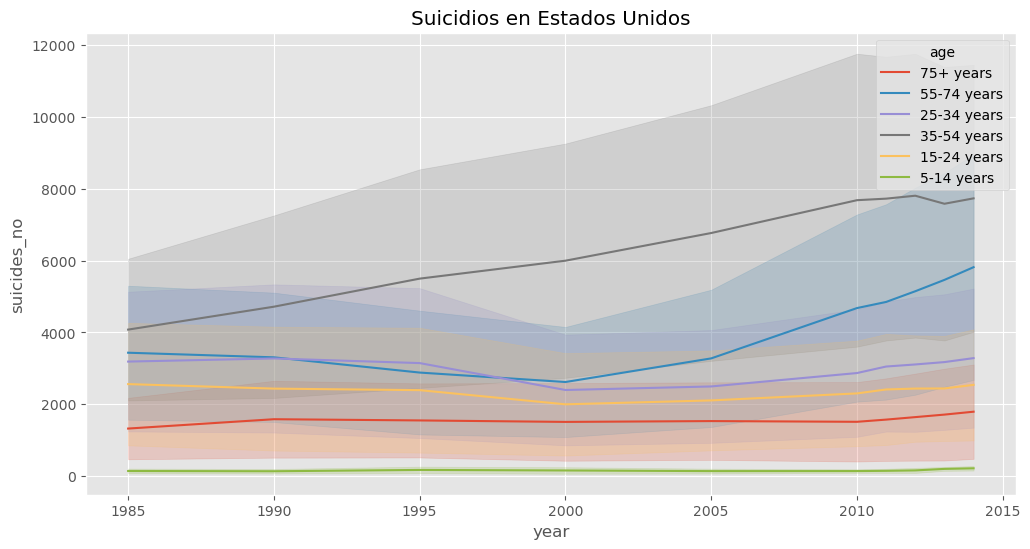

In [22]:
sns.lineplot(x = 'year', y = 'suicides_no', hue='age', data=df2)
_ =plt.title('Suicidios en Estados Unidos')

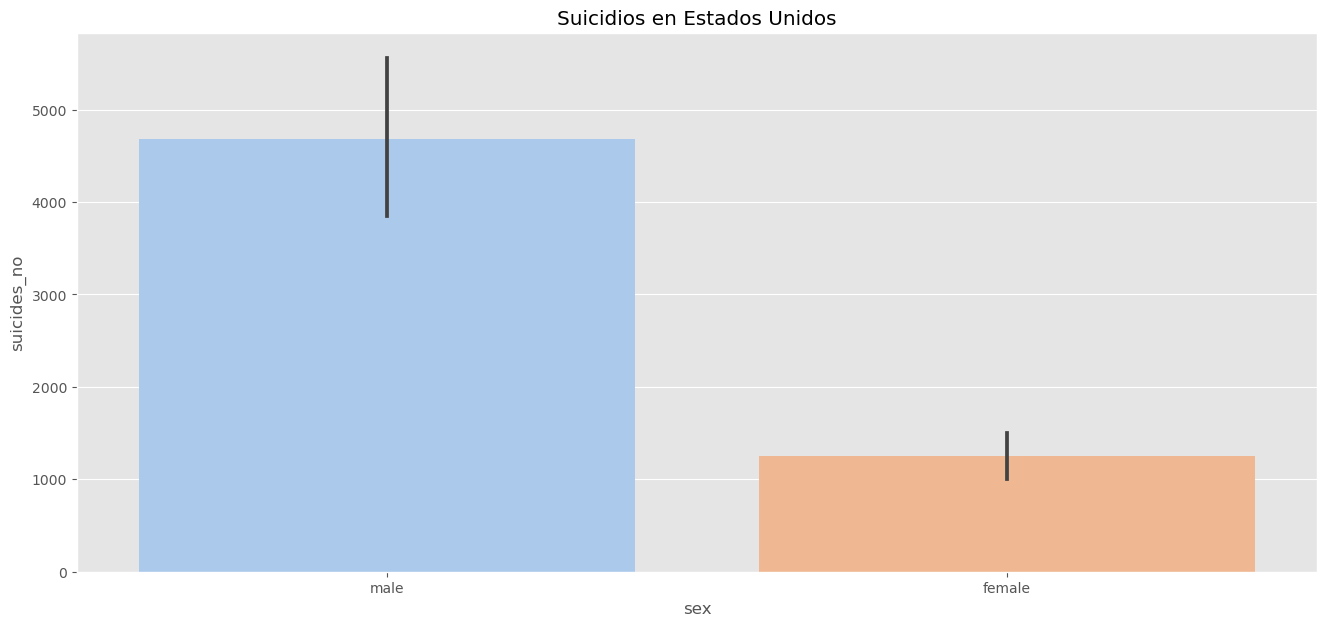

In [23]:
plt.figure(figsize=(16,7))
sns.barplot(x="sex", y="suicides_no", data=df2, palette="pastel")
_ =plt.title('Suicidios en Estados Unidos')

<h2><font color="#004D7F" size=6> Suicidios en  Japon </font></h2>

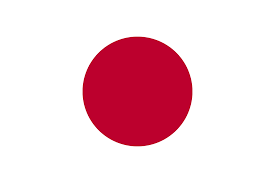


In [24]:
df3=df[df['country']=='Japan']

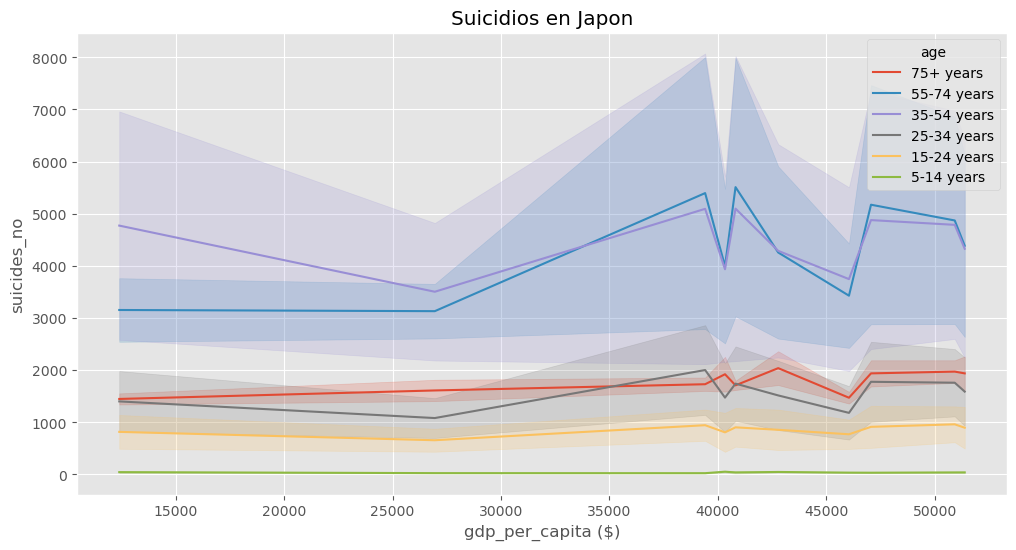

In [25]:
sns.lineplot(x = 'gdp_per_capita ($)', y = 'suicides_no', hue='age', data=df3)
_ =plt.title('Suicidios en Japon')

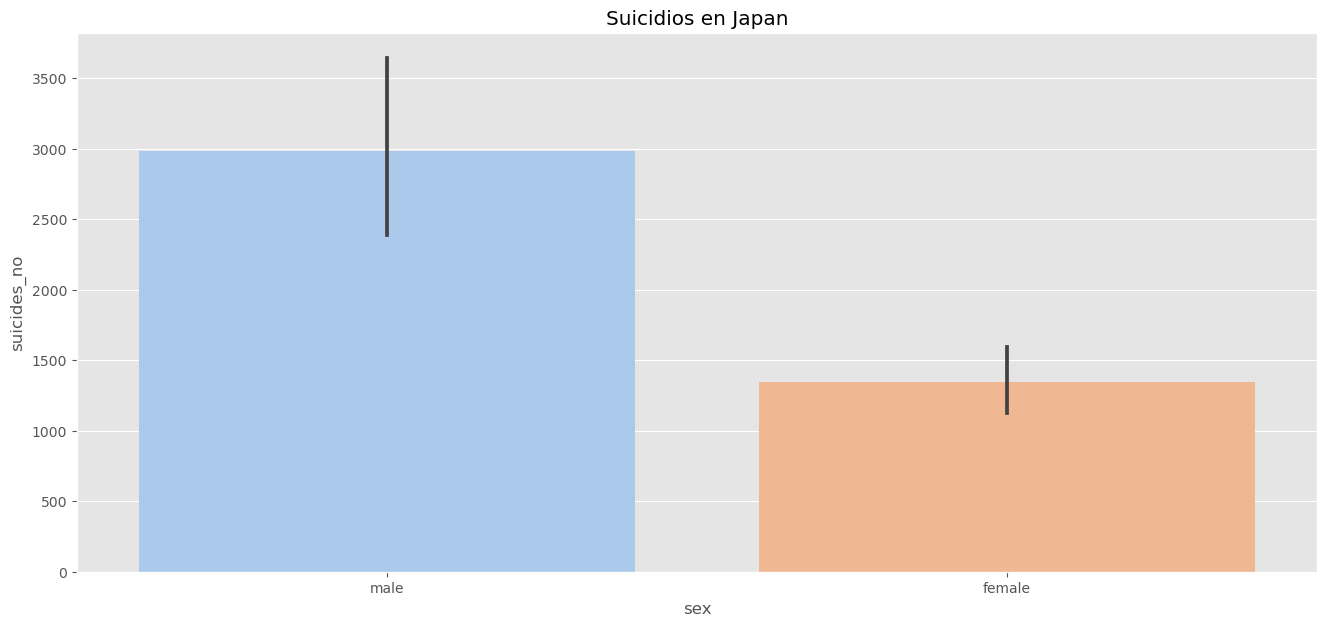

In [26]:
plt.figure(figsize=(16,7))
sns.barplot(x="sex", y="suicides_no", data=df3, palette="pastel")
_ =plt.title('Suicidios en Japan')

In [27]:
spa = paises.get_group('Japan')
swe = paises.get_group('South Africa')

In [28]:
# Se usa la función plot() de Matplotlib


In [29]:
##

<h2><font color="#004D7F" size=6> Suicidios en  sur america </font></h2>

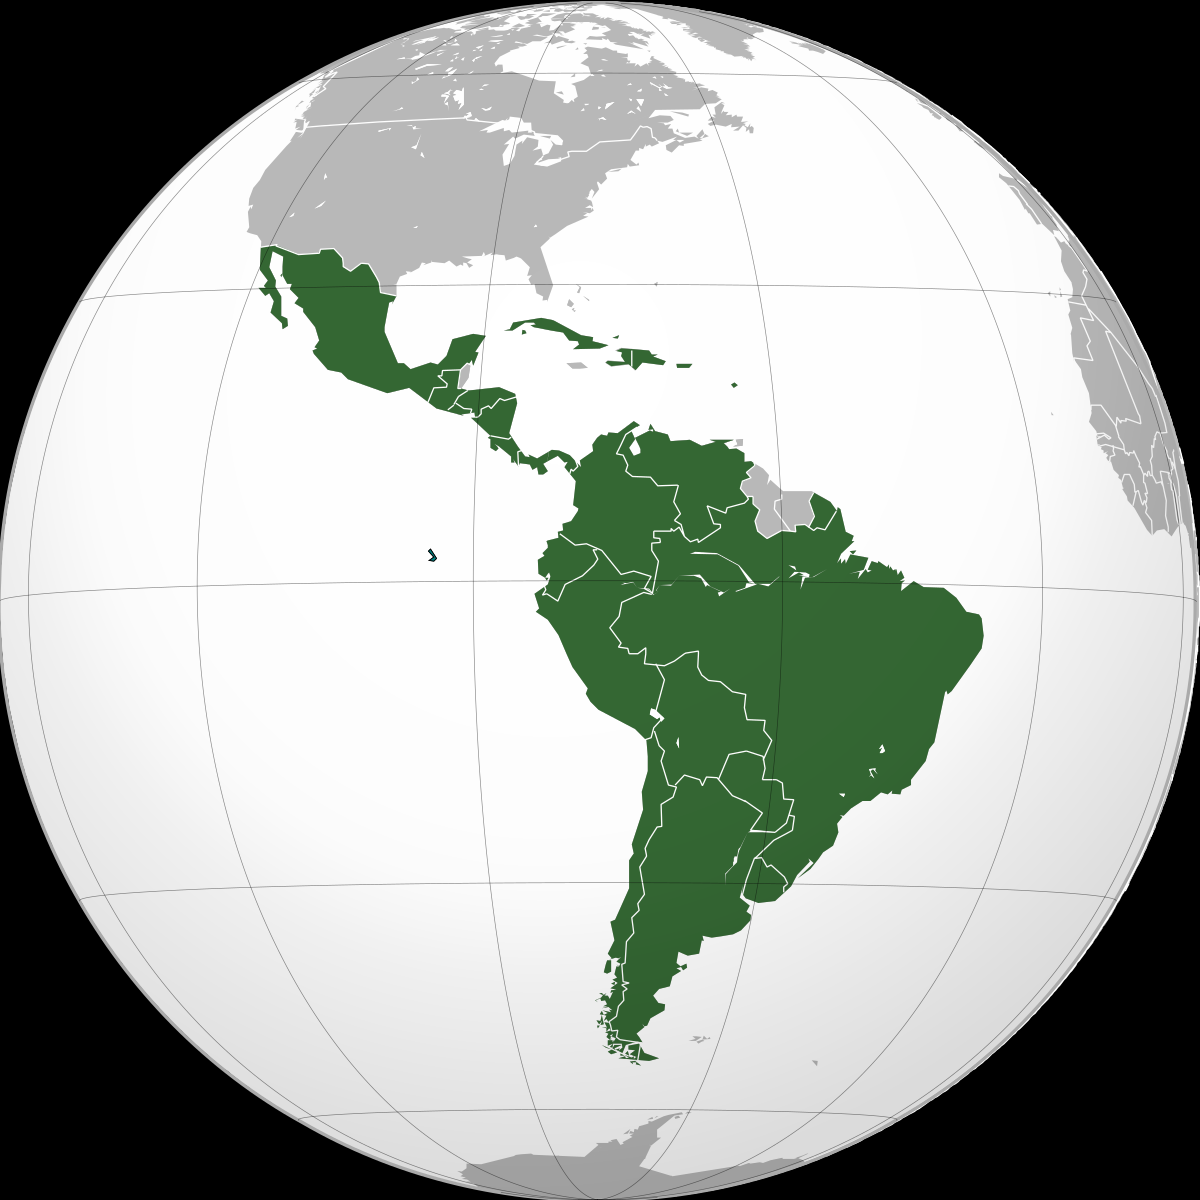

In [30]:
Argentina = df.loc[df.loc[:, 'country']=='Argentina',:]
Brazil = df.loc[df.loc[:, 'country']=='Brazil',:]
Chile = df.loc[df.loc[:, 'country']=='Chile',:]
Ecuador = df.loc[df.loc[:, 'country']=='Ecuador',:]
Colombia = df.loc[df.loc[:, 'country']=='Colombia',:]
Paraguay = df.loc[df.loc[:, 'country']=='Paraguay',:]
ElSalvador=df.loc[df.loc[:, 'country']=='ElSalvador',:]
Mexico=df.loc[df.loc[:, 'country']=='Mexico',:]

In [31]:
Mexico

country  year     sex          age  suicides_no  population  \
16564  Mexico  1985    male    75+ years           44      432000   
16565  Mexico  1985    male  55-74 years          145     2330000   
16566  Mexico  1985    male  25-34 years          340     5679000   
16567  Mexico  1985    male  35-54 years          327     5836000   
16568  Mexico  1985    male  15-24 years          375     8420000   
...       ...   ...     ...          ...          ...         ...   
16919  Mexico  2014  female  35-54 years          333    15556091   
16920  Mexico  2014  female  55-74 years           91     6743397   
16921  Mexico  2014    male   5-14 years          129    11844045   
16922  Mexico  2014  female   5-14 years          109    11316008   
16923  Mexico  2014  female    75+ years            8     1862263   

       suicides/100k pop  gdp_for_year ($)   gdp_per_capita ($)  \
16564              10.19    184,472,557,415                2730   
16565               6.22    184,472,557,415                2730   
16566               5.99    184,472,557,415                2730   
16567               5.60    184,472,557,415                2730   
16568               4.45    184,472,557,415                2730   
...                  ...                ...                 ...   
16919               2.14  1,314,385,330,073               11663   
16920               1.35  1,314,385,330,073               11663   
16921               1.09  1,314,385,330,073               11663   
16922               0.96  1,314,385,330,073               11663   
16923               0.43  1,314,385,330,073               11663   

            generation  
16564  G.I. Generation  
16565  G.I. Generation  
16566          Boomers  
16567           Silent  
16568     Generation X  
...                ...  
16919     Generation X  
16920          Boomers  
16921     Generation Z  
16922     Generation Z  
16923           Silent  

[120 rows x 10 columns]

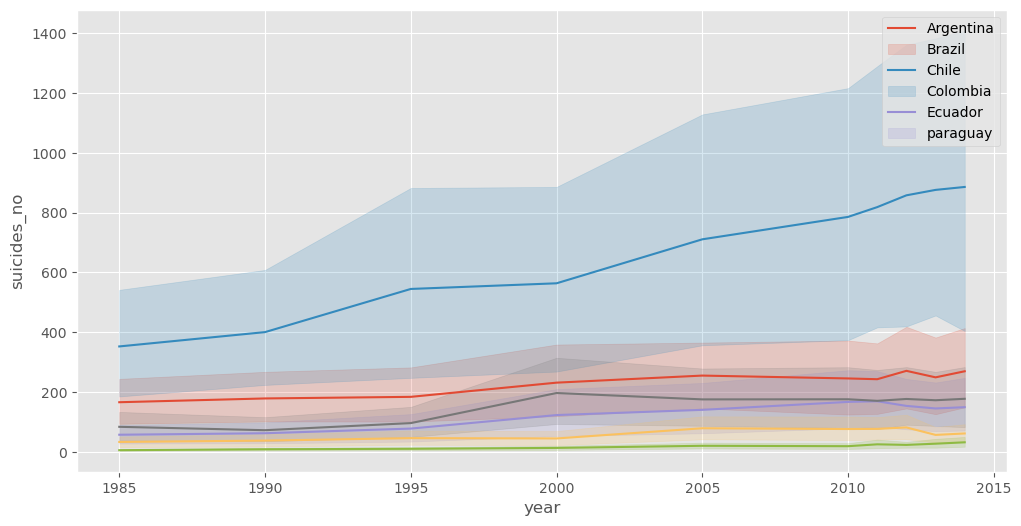

In [32]:
p = sns.lineplot(x='year', y='suicides_no', data=Argentina)
q = sns.lineplot(x='year', y='suicides_no', data=Brazil)
r = sns.lineplot(x='year', y='suicides_no', data=Chile)
s = sns.lineplot(x='year', y='suicides_no', data=Colombia)
t = sns.lineplot(x='year', y='suicides_no', data=Ecuador)
v = sns.lineplot(x='year', y='suicides_no', data=Paraguay)
_ = plt.legend(['Argentina', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'paraguay'])


In [33]:
# Conclusion

In [34]:
import dash
from dash import dcc

#from dash_core_components import dcc
from dash import html
#from dash_html_components import html
from dash.dependencies import Input, Output
from jupyter_dash import JupyterDash
#import plotly.graph_objs as go

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

In [35]:
# se crea la aplicación
app  =JupyterDash(__name__)
app.title='suicidios'

In [36]:
title=html.H1('suicidios') # crea el titulo de la pagina 

In [37]:
df.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

In [38]:
scatter_header=html.H4('Suicidios en el mundo ')
scatter_header


H4('Suicidios en el mundo ')

In [39]:
#(wb_data, x='gdpPercap', y='lifeExp', size='pop', color='continent', animation_frame='year',
 #             hover_name='country',

fig=px.scatter(df,  y='suicides_no', size='suicides/100k pop' ,color='sex', animation_frame='year',
              hover_name='country')

fig.show()
#sns.lineplot(x = 'year', y = 'suicides_no', hue='age', data=df)

In [40]:

fig=px.bar(df, x='gdp_per_capita ($)', y='suicides_no',  color='sex', animation_frame='year',
              hover_name='country')

fig.show()

In [41]:
fig=px.scatter(df,  y='suicides_no', size='population' ,color='age', animation_frame='year',
              hover_name='country')

fig.show()